<a href="https://colab.research.google.com/github/prajaktapawar1234567/Deep-Learning-Assignments/blob/master/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)

169017344/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3)


In [3]:
y_train.shape

(50000, 1)

In [4]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)

Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


In [5]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,3)

# store the shape of a single image 
input_shape = (img_rows, img_cols,3)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 100


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 9, 9, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 5184)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               663680    
                                                      

In [9]:
batch_size = 32
epochs = 10
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                   validation_data = (x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 165s 105ms/step - loss: 4.5825 - accuracy: 0.0163 - val_loss: 4.4915 - val_accuracy: 0.0321
Epoch 2/10
1563/1563 [==============================] - 150s 96ms/step - loss: 4.3957 - accuracy: 0.0386 - val_loss: 4.1719 - val_accuracy: 0.0801
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 4.1818 - accuracy: 0.0657 - val_loss: 3.9632 - val_accuracy: 0.1228
Epoch 4/10
1563/1563 [==============================] - 150s 96ms/step - loss: 4.0138 - accuracy: 0.0899 - val_loss: 3.7841 - val_accuracy: 0.1517
Epoch 5/10
1563/1563 [==============================] - 150s 96ms/step - loss: 3.8758 - accuracy: 0.1091 - val_loss: 3.6437 - val_accuracy: 0.1728
Epoch 6/10
1563/1563 [==============================] - 150s 96ms/step - loss: 3.7484 - accuracy: 0.1306 - val_loss: 3.5034 - val_accuracy: 0.1926
Epoch 7/10
1563/1563 [==============================] - 149s 96ms/step - loss: 3.6330 - accuracy: 0.1501 - val_loss: 

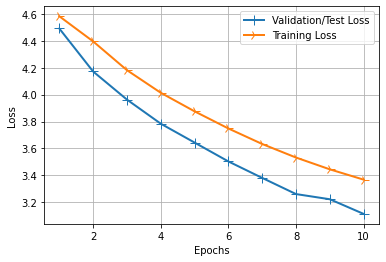

In [10]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()